In [4]:
import os 
import subprocess
import numpy
import torch
from torch import nn
from dltool import test,train

- Numpy点积在CPU上执行，torch矩阵乘法是在GPU上执行，后者快
- 默认下，GPU操作在torch是异步的，在返回前强制完成所有计算？

In [5]:
# GPU计算热身
device = train.try_gpu(1)
a = torch.randn(size=(1000,1000), device = device)
b = torch.mm(a,a)

with test.Benchmark('numpy'):
  for _ in range(10):
    a = numpy.random.normal(size=(1000,1000))
    b = numpy.dot(a,a)

with test.Benchmark('torch'):
  for _ in range(10):
    a = torch.randn(size=(1000,1000), device = device)
    b = torch.mm(a,a)

numpy: 1.1224 sec
torch: 0.0106 sec


PyTorch实际上由前端和后端组成，前端可以是任意语言，比如python、C++;而程序的执行主要发生在后端C++,前端发出的操作传递到后端执行，后端管理自己的线程
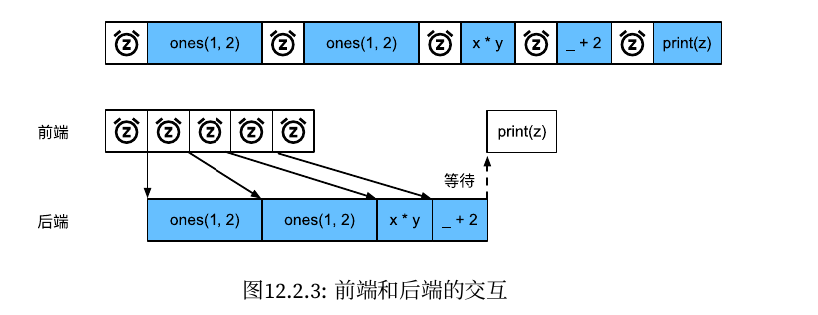